#### 패키지 

In [1]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
import matplotlib.pyplot as plt
from gensim.models import Word2Vec
from sklearn.decomposition import PCA

In [5]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /Users/com/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /Users/com/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /Users/com/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /Users/com/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /Users/com/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /Users/com/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /Users/co

True

## 텍스트 데이터 다루기

검색 질의를 입력하면 해당 사이트의 알고리즘은 내가 그 제품, 항목에 관심이 있다는 것을 학습한다.  
유사한 제품, 동영상 등을 나에게 제공한다.  
구글, 페이스북, 트위터 같은 회사들에게 광고는 주요 수입원 중 하나이다. 

많은 양의 텍스트를 지속적으로 분석해 고객의 라이프스타일에 관한 가치 있는 정보를 추출한다.  
대부분 이 정보는 데이터마이닝해서 가치 있는 통찰을 추출할 수 있는 제3자에게 매도된다.  
텍스트 마이닝은 진보된 자연어 처리 알고리즘(=NLP)를 사용해 텍스트에서 가치를 추출하려고 하는 회사들에서 수행된다. 

텍스트 데이터의 또다른 분석 예는, 챗봇이다.  
챗봇은 고객이 묻는 것을 이해하고 정확히 응답할 수 있을 만큼 지적이여야 한다.  
많은 온라인 직원 서비스가 챗봇을 채택하고 있으며, 상대방은 이쪽이 사람이 아니라는 사실조차도 모르고 있을 수 있다. 

ORIGINAL_DATA:  We are studying Machine Learning. Our Model learns patterns in data. This learning helps it to predict on new data.
-----------------------------------
WORD_TOKENS:  ['we', 'are', 'studying', 'machine', 'learning', '.', 'our', 'model', 'learns', 'patterns', 'in', 'data', '.', 'this', 'learning', 'helps', 'it', 'to', 'predict', 'on', 'new', 'data', '.']
-----------------------------------
SENTENCE TOKENS:  ['we are studying machine learning.', 'our model learns patterns in data.', 'this learning helps it to predict on new data.']
-----------------------------------
STOP_WORDS:  ['is', 'a', 'our', 'on', '.', '?', '!', 'we', 'are', 'this', 'of', 'and', 'from', 'to', 'it', 'in']
-----------------------------------
CLEANED WORD TOKENS:  ['studying', 'machine', 'learning', 'model', 'learns', 'patterns', 'data', 'learning', 'helps', 'predict', 'new', 'data']
-----------------------------------
CLEANED STEMMED TOKENS:  ['studi', 'machin', 'learn', 'model', 'learn', 'pattern', '

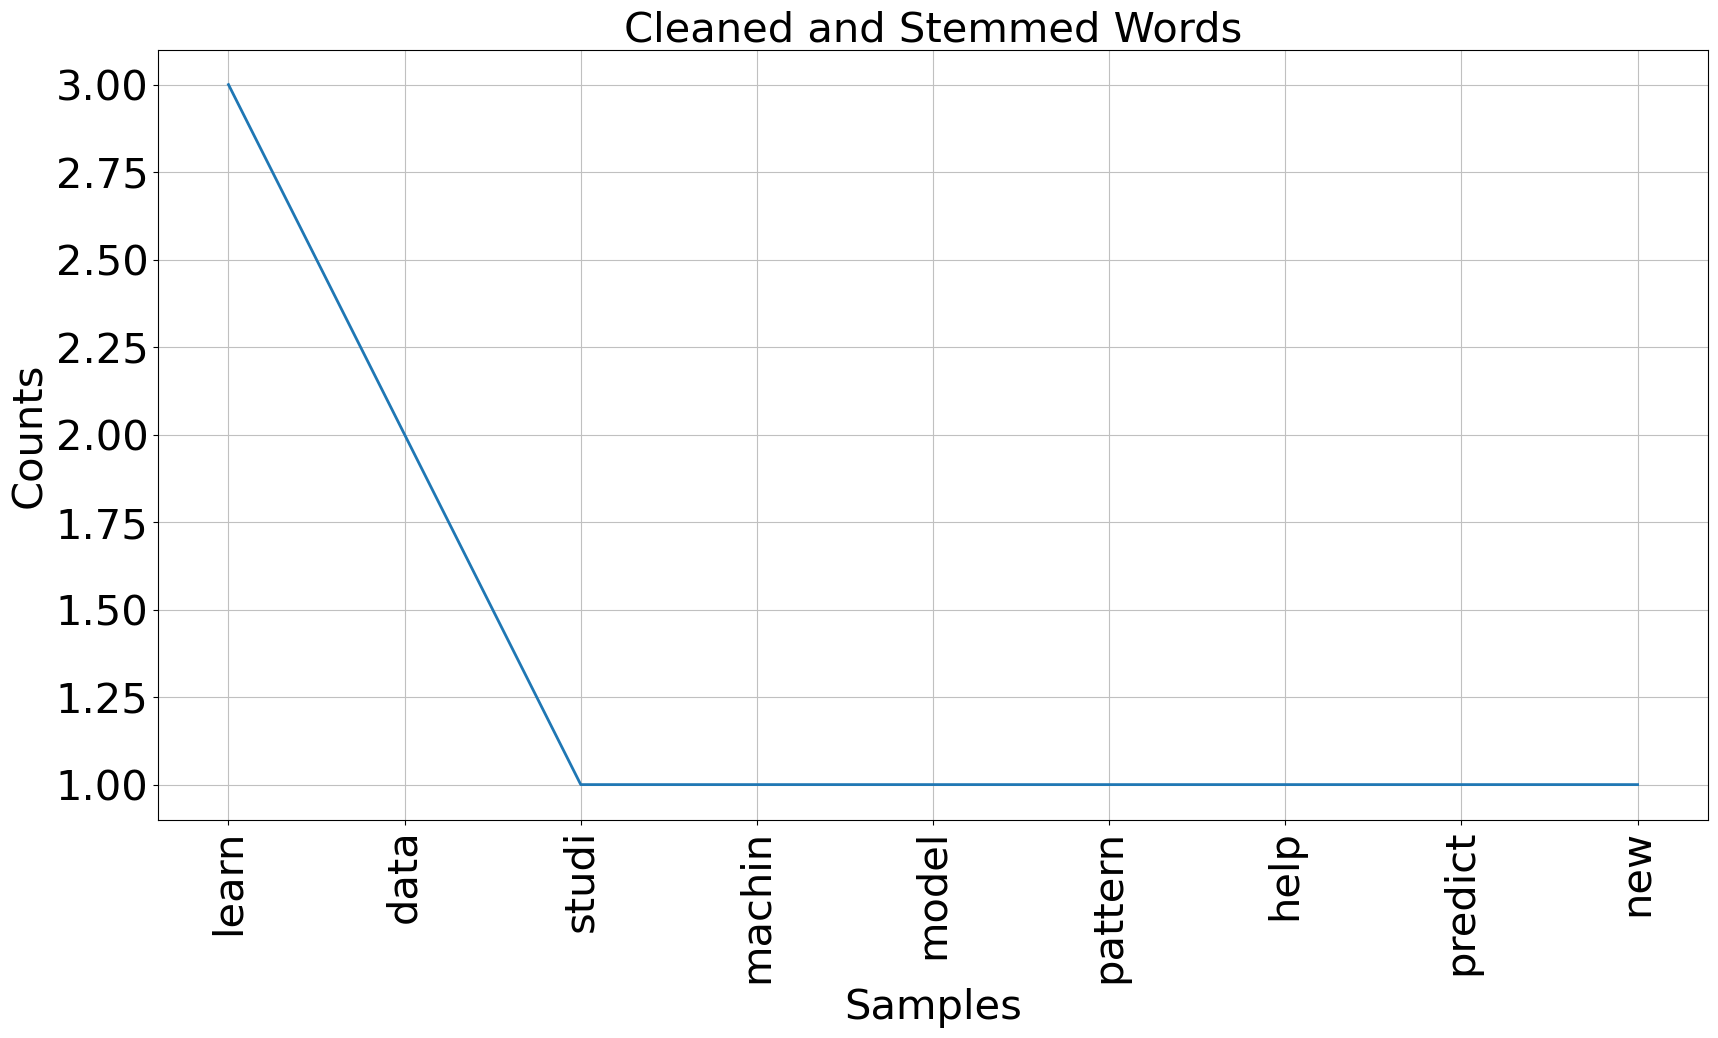

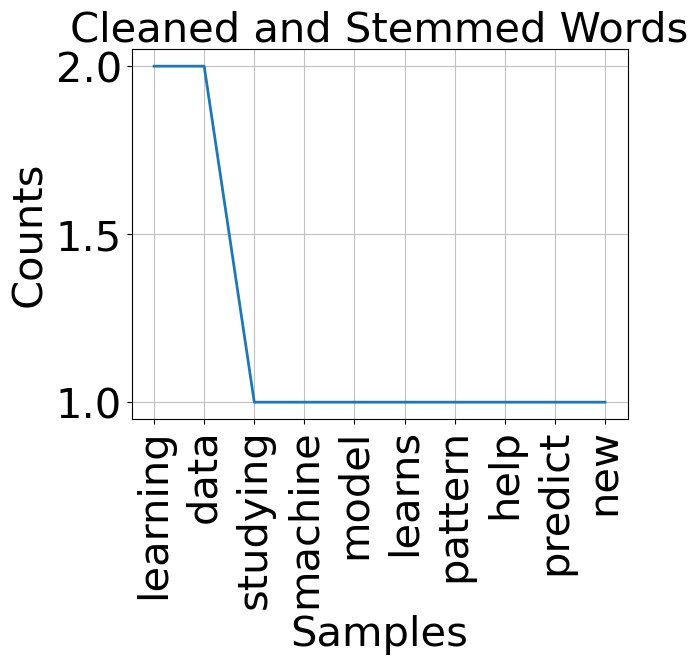

In [8]:
import nltk 

# 분석할 텍스트 문서 
mytext = "We are studying Machine Learning. Our Model learns patterns in data. This learning helps it to predict on new data."
print("ORIGINAL_DATA: ", mytext)
print('-----------------------------------')

# 텍스트를 소문자로 변환 
mytext = mytext.lower()

# 우선, 텍스트를 단어 토큰들로 토큰화한다. 
word_tokens = nltk.word_tokenize(mytext)
print("WORD_TOKENS: ", word_tokens)
print('-----------------------------------')

# 필요하다면 문장들을 추출할 수도 있다. 
sentence_tokens = nltk.sent_tokenize(mytext)
print('SENTENCE TOKENS: ', sentence_tokens)
print('-----------------------------------')

# 자주 사용하는 불용어들을 제거하자. 
stp_words = ['is', 'a', 'our', 'on', '.', '?', '!', 'we', 'are', 'this', 'of', 'and', 'from', 'to', 'it', 'in']
print("STOP_WORDS: ", stp_words)
print('-----------------------------------')

# 정제될 토큰들의 배열을 정의
clean_tokens = []

# 단어 토큰 word_tokens에서 불용어 제거 
for token in word_tokens:
    if token not in stp_words:
        clean_tokens.append(token)

print("CLEANED WORD TOKENS: ", clean_tokens)
print('-----------------------------------')

from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer

lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

# 정제되고 표제어 추출된(lemmatized) 토큰 배열 정의 
clean_lemma_tokens = []
clean_stem_tokens = []

# 단어 토큰들에서 불용어 제거 
for token in clean_tokens:
    clean_stem_tokens.append(stemmer.stem(token))
    clean_lemma_tokens.append(lemmatizer.lemmatize(token))

print("CLEANED STEMMED TOKENS: ", clean_stem_tokens)
print('-----------------------------------')

print("CLEANED LEMMAIZED TOKENS: ", clean_lemma_tokens)
print('-----------------------------------')

# 단어의 도수 분포 구하기 
freq_lemma = nltk.FreqDist(clean_lemma_tokens)
freq_stem = nltk.FreqDist(clean_stem_tokens)

# 플롯팅 라이브러리 import 
import matplotlib.pyplot as plt
%matplotlib inline

# 폰트 크기 설정 
chart_fontsize = 30

# 도수 분포 차트 그리기
plt.figure(figsize=(20, 10))
plt.tick_params(labelsize=chart_fontsize)
plt.title('Cleaned and Stemmed Words', fontsize = chart_fontsize)
plt.xlabel('Word Tokens', fontsize = chart_fontsize)
plt.ylabel("Frequency(Counts)", fontsize = chart_fontsize)
freq_stem.plot(20, cumulative=False)
plt.show()

# 도수 분포 차트 그리기
# plt.figure(figsize=(20, 10))
plt.tick_params(labelsize=chart_fontsize)
plt.title('Cleaned and Stemmed Words', fontsize = chart_fontsize)
plt.xlabel('Word Tokens', fontsize = chart_fontsize)
plt.ylabel("Frequency(Counts)", fontsize = chart_fontsize)
freq_lemma.plot(20, cumulative=False)
plt.show() 

- stemming: 어간 추출  
- lemmatization: 표제어 추출  

-> 동일한 단어의 다른 형태들을 제거해 텍스트를 단순화  
예) learn의 변화형인 learns, learning, learned 같은 단어들을 제거하려는 것 

stemming(어간 추출) : s, es, ing 같이 자주 쓰이는 접미사들을 잘라버리는 좀 더 발견적(heuristic)한 방법  
그 과정에서 원래의 뜻을 잃어버리기도 한다. 

어간 추출 결과를 보면, machin, studi와 같은 비어(nonword)가 보인다. 

표제어 추출 :  
실질적인 기초어(root word)를 찾으려고 하며, 유효한 단어들이 나온다. 

텍스트 데이터를 정제한 이후에는, 유용한 정보를 추출하기 위한 방법을 살펴본다.  
품사 태깅(POS 태깅: Part-of-Speech Tagging)과 개체명 인식(NER, Named Entity Recoginition)이라고 하는  
두 가지 텍스트 처리 개념을 살펴 보자. 

품사 태깅:  
- 단어 토큰화된 문장에 대해 명사, 동사, 형용사 같은 품사들을 식별  

개체명 인식:  
- 품사에서 한 단계 더 나아가 
- 사람, 조직, 사건과 같은 실질적인 개체들을 식별 

In [6]:
# 분석할 문장의 정의 
mysentence = "Mark is working at GE"
print("SENTENCE TO ANALYZE: ", mysentence)
print('-----------------------------------')

# 문장에 대한 품사(parts of speech, pos)를 매핑한다. 
word_tk = nltk.word_tokenize(mysentence)
pos_tags = nltk.pos_tag(word_tk)
print("PARTS OF SPEECH FOR SENTENCE= ", pos_tags)

entities = nltk.chunk.ne_chunk(pos_tags)
print('NAMED ENTITIES FOR SENTENCE= ', entities)
print('-----------------------------------')

SENTENCE TO ANALYZE:  Mark is working at GE
-----------------------------------
PARTS OF SPEECH FOR SENTENCE=  [('Mark', 'NNP'), ('is', 'VBZ'), ('working', 'VBG'), ('at', 'IN'), ('GE', 'NNP')]
NAMED ENTITIES FOR SENTENCE=  (S (PERSON Mark/NNP) is/VBZ working/VBG at/IN (ORGANIZATION GE/NNP))
-----------------------------------


Mark와 GE가 대명사로, is와 working은 동사로 태깅되었다.  
NER을 수행하면, Mark를 person으로, GE는 organization으로 인식한다.  
더 큰 규모의 텍스트를 분석하게 될 때, 이러한 기법은 주요 개체명을 추출하는 매우 유용한 도구가 될 수 있다. 

## 단어 임베딩 

지금까지는 텍스트를 있는 그대로 두고 데이터를 정제하고, 단어 빈도를 구하고 품사나 개체명을 추출하기 위한 NLP 기법들을 적용했다.  
그러나 더 복잡한 처리를 위해서는 더 많은 정보를 추출하는 데 도움이 될 수 있도록  
텍스트를 벡터나 배열로 변환할 필요가 있다.  

이것은 처리를 더 잘하기 위해 이미지를 픽셀 밝기 값들의 배열로 변환했던 것과 마찬가지다.  

텍스트 데이터에서 정보를 추출하기 위한 핵심은 텍스트를 시퀀스로 취급해야 한다는 것이다.  
단어들을 순서대로 처리해 문맥적 정보가 올바르게 포착되도록 해야 한다. 

### one-hot encoding

단어 벡터를 만드는 가장 기초적인 방법은, one-hot encoding을 사용하는 것 

가능한 모든 범주들만큼 원소를 갖는 커다란 이진 배열을 갖게 된다.  
임의의 데이터 포인트에 대해서, 그 데이터 포인트의 범주를 나타내는 위치(1로 표시)를 제외하면 모든 원소의 값이 0이 된다. 

1. 유효한 모든 단어들의 어휘 목록을 만든다.  
    - 어휘 목록은 말뭉치의 모든 단어를 분석하여 만든다. 

이 어휘 목록은 텍스트 양이 얼마 안 된다.  
그런 다음 이 어휘 목록을 이용해 one-hot encoding된 벡터들을 만들 수 있다.

In [10]:
# 분석한 문장을 정의한다.  
mytext = "AI is the new electricity. AI is poised to start a large transformation on many industries."

# 우선 텍스트를 토큰화한다. 
word_tk = nltk.word_tokenize(mytext)
print(type(word_tk)) # list 
words = [w.lower() for w in word_tk]

# 모든 유효한 단어들의 어휘 목록을 생성한다. 
vocab = sorted(set(words))

print("VOCABULARY: ", vocab)
print('-----------------------------------')

# 각 단어에 대한 one-hot encoding 수행 
for myword in vocab:
    test_1hot = [0] * len(vocab)
    test_1hot[vocab.index(myword)] = 1
    print("ONE HOT VECTOR for '%s' = "%myword, test_1hot)

<class 'list'>
VOCABULARY:  ['.', 'a', 'ai', 'electricity', 'industries', 'is', 'large', 'many', 'new', 'on', 'poised', 'start', 'the', 'to', 'transformation']
-----------------------------------
ONE HOT VECTOR for '.' =  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
ONE HOT VECTOR for 'a' =  [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
ONE HOT VECTOR for 'ai' =  [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
ONE HOT VECTOR for 'electricity' =  [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
ONE HOT VECTOR for 'industries' =  [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
ONE HOT VECTOR for 'is' =  [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
ONE HOT VECTOR for 'large' =  [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
ONE HOT VECTOR for 'many' =  [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
ONE HOT VECTOR for 'new' =  [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
ONE HOT VECTOR for 'on' =  [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
ONE HOT VECTOR for 'poised' =  [0, 0, 0, 0, 0, 0, 0, 

문장이 몇 개뿐인 작은 텍스트에서도 큰 벡터가 나온다.  
수천 또는 수백만 개의 단어가 있는 말뭉치에서는 벡터가 극도로 커지게 된다.  
그러므로 이 방법은 바람직하지 않다. 

텍스트를 표현하는 또다른 방법은 빈도수를 사용하는 것이다. 각 문장 또는 문서를 각 단어가 출현하는 횟수의 배열로 표현할 수 있다.  
단어들의 상대적 중요도를 나타내기 위해 횟수를 비율로 변환할 수 있다.  
이러한 접근법의 문제는 and, to, the 등 불용어(stopword)의 빈도가 매우 높게 나타난다는 것이다. 

### TF-IDF
- term frequency-inverse document frequency

문서들의 모음 또는 말뭉치에서 어떤 단어의 문서에 대한 중요도를 반영하기 위한 통계량이다.  
단어들에 대한 빈도를 부여 + 동시에 말뭉치 내의 다른 문서들에 나타나는 단어들과도 비교  

말뭉치의 많은 다른 문서들에서 그 단어가 출현하면 불용어일 가능성이 높다.  
<->  
특정한 문서에서는 빈도가 높지만 다른 문서에서 그렇지 않다면 그 단어는 문서의 주제 영역에 속할 가능성이 높다. 

TF-IDF의 문제점 : 어휘 목록의 크기가 크기 때문에 벡터가 상당히 커질 수 있다는 점  
+  
TF-IDF는 단어의 문맥을 포착하지 못한다 // 문맥을 포착하기 위해 단어 시퀀스를 고려하지 않는다. 

### 단어 임베딩 

최신 시스템들은 단어를 벡터로 변환하기 위해 단어 임베딩(word embedding)이라는 방법을 사용한다.  
임베딩 값은 유사한 단어들이 함께 모여 나타나도록 할당한다.  
이 개념을 토픽 모델링이라 한다. 

우리는 토픽 모델링에 초점을 맞춘 Gensim이라는 오픈 소스 라이브러리를 사용할 것이다. 

In [30]:
# word2vec 모델 import 
from gensim.models import Word2Vec

# 분석할 텍스트 문서
mytext = "AI is the new electricity. AI is poised to start a large transformation on many industries."
print("ORIGINAL TEXT= ", mytext)
print('-----------------------------------')

# 텍스트를 소문자로 변환 
mytext = mytext.lower()

# 필요한 경우 문장들을 추출할 수 있다. 
sentence_tokens = nltk.sent_tokenize(mytext)
print("SENTENCE TOKENS= ", sentence_tokens)
print('-----------------------------------')

# 불용어 제거
stp_words = ["is", 'a', 'our', 'on', '.', '!', 'we', 'are', 'this', 'of', 'and', 'from', 'to', 'it', 'in']

# 훈련 데이터의 정의 
sentences = []
for sentence in sentence_tokens:
    word_tokens = nltk.word_tokenize(sentence)

    clean_tokens = []

    # word_tokens에서 불용어 제거
    for token in word_tokens:
        if token not in stp_words:
            clean_tokens.append(token)
    
    sentences.append(clean_tokens)

print("TRAINING DATA= ", sentences)
print('-----------------------------------')

# 우리 데이터에서 새 word2vec 모델 훈련하기 - 임베딩 크기는 20
word2vec_model = Word2Vec(sentences, vector_size=20, min_count=1)

# 우리 말뭉치에서 학습된 어휘 목록을 출력 
words = list(word2vec_model.wv.key_to_index)
# words = list(word2vec_model.wv.vocab) # gensim 3.8.0 -> 4.0.0으로 업데이트하면서 바뀜 
print("VOCABULARY OF MODEL= ", words)
print('-----------------------------------')

# 몇몇 단어에 대한 임베딩 벡터 표시 - 에러 남 
print("EMBEDDING VECTOR FOR THE WORD 'ai'= ", word2vec_model.wv['ai'])
print("EMBEDDING VECTOR FOR THE WORD 'electricity'= ", word2vec_model.wv['electricity'])
# 아래는 교재 코드 - 에러 남 
# print("EMBEDDING VECTOR FOR THE WORD 'electricity'= ", word2vec_model['electricity'])


ORIGINAL TEXT=  AI is the new electricity. AI is poised to start a large transformation on many industries.
-----------------------------------
SENTENCE TOKENS=  ['ai is the new electricity.', 'ai is poised to start a large transformation on many industries.']
-----------------------------------
TRAINING DATA=  [['ai', 'the', 'new', 'electricity'], ['ai', 'poised', 'start', 'large', 'transformation', 'many', 'industries']]
-----------------------------------
VOCABULARY OF MODEL=  ['ai', 'industries', 'many', 'transformation', 'large', 'start', 'poised', 'electricity', 'new', 'the']
-----------------------------------
EMBEDDING VECTOR FOR THE WORD 'ai'=  [-0.00268114  0.00118216  0.02551675  0.04504637 -0.04651475 -0.03558404
  0.03229436  0.04486494 -0.02507714 -0.01881686  0.03690252 -0.00766736
 -0.02268307  0.03277026 -0.0243008  -0.00908009  0.0143829   0.00495937
 -0.04142607 -0.04724409]
EMBEDDING VECTOR FOR THE WORD 'electricity'=  [ 0.03949034 -0.03494752 -0.04577933 -0.0017787

Word2Vec.model.wv.vocab(3.8.0) -> Word2Vec.model.wv.key_to_index(4.0.0)으로 변환되었다.  
  
4. vocab dict became key_to_index for looking up a key's integer index, or get_vecattr() and set_vecattr() for other per-key attributes:
https://github.com/RaRe-Technologies/gensim/wiki/Migrating-from-Gensim-3.x-to-4

Word2Vec 모델은 제공된 현재의 작은 규모의 텍스트로부터 얼마간의 어휘를 학습했다.  
이 데이터로부터 스스로 학습했으며 이제는 특정 단어에 대한 임베딩을 제공해 줄 수 있다.  

임베딩 벡터는 아무런 의미를 가지고 있지 않다.  
그러나 이 임베딩 벡터는 단어들 주변의 패턴과 단어들이 나타나는 순서 또는 시퀀스를 관찰하면서 구축된 것이다. 

이들 임베딩은 단어들의 수학적 분석과 유사성 분석 그리고 딥러닝 분석을 하는 데 사용될 수 있다. 

여기에서 임베딩 벡터들은 20차원이므로 벡터를 표시하면 20개의 행을 갖는다.  
20차원의 단어 임베딩은 시각화하기 곤란하다. 벡터들을 2차원으로 만들어 도표로 나타내면 벡터의 의미를 파악할 수 있다. 

### 주성분 분석(PCA, Principal Component Analysis)

비지도학습 기법인 주성분 분석을 사용해 20차원 벡터를 2차원 벡터로 축소하고자 한다.  
PCA를 적용하면 정보의 손실은 발생하지만, 20차원에 표시된 데이터 포인트들의 최대 변동성을 포착해낸다.  

PCA를 적용해 단어를 도표에 표시하는 예제를 살펴보자.

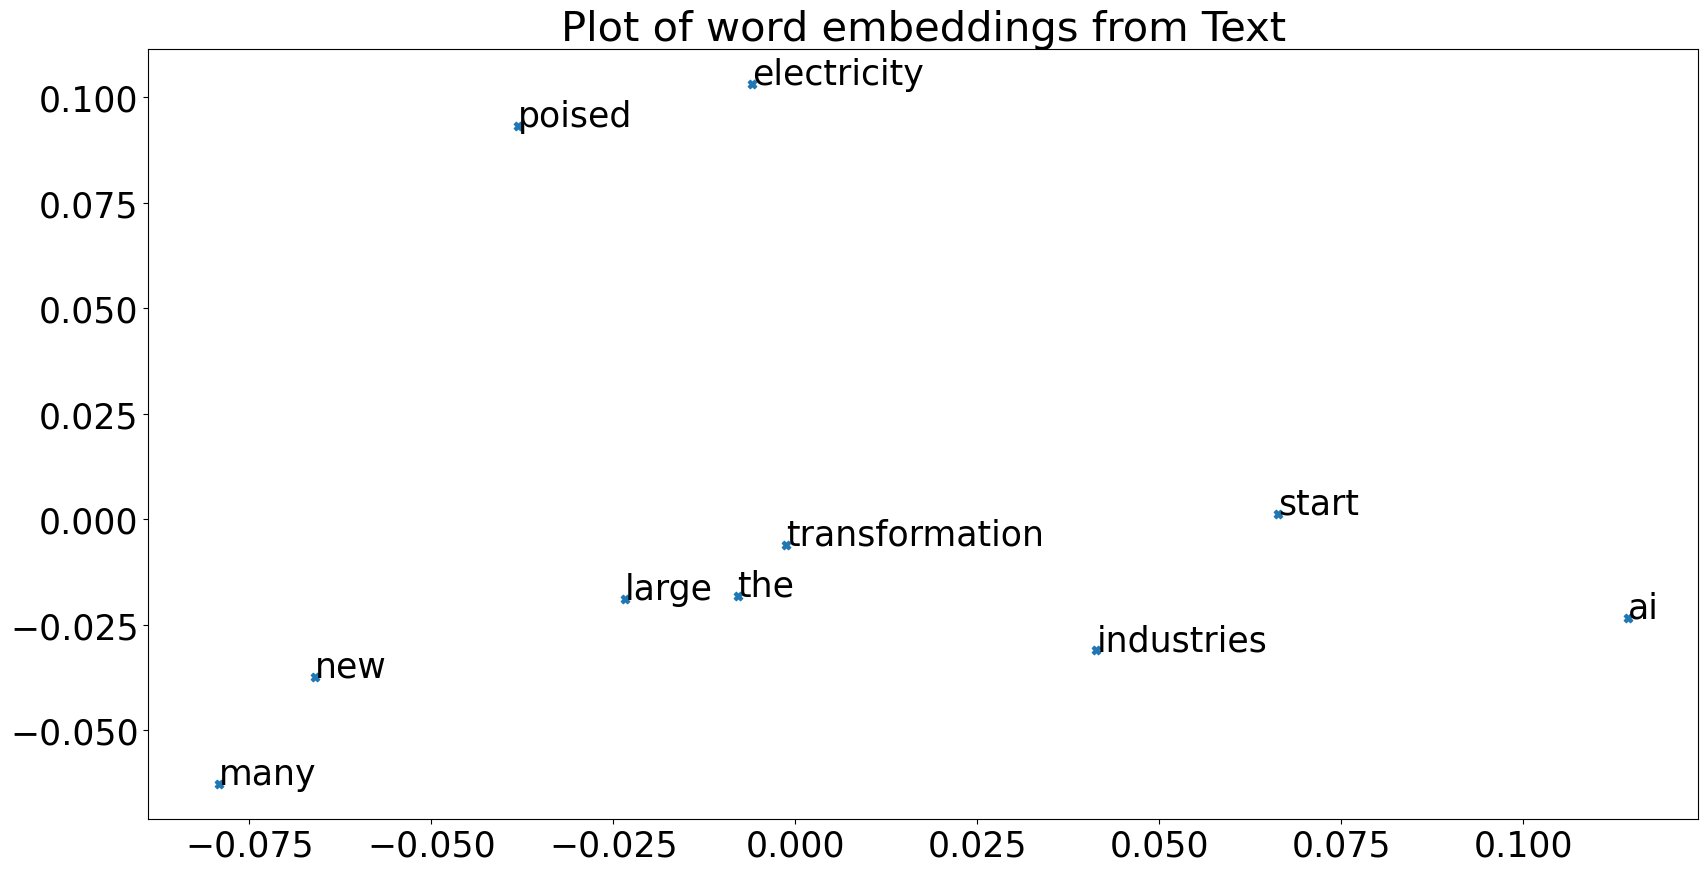

In [31]:
# scikit-learn에서 PCA 라이브러리를 import 
from sklearn.decomposition import PCA

# word2vec 모델을 사용해 훈련 데이터를 만든다. 
training_data = word2vec_model.wv[word2vec_model.wv.key_to_index]
# PCA를 사용해 단어 벡터를 2차원으로 만든다. 
pca = PCA(n_components=2)
result = pca.fit_transform(training_data)

# 2차원 벡터들의 산점도 생성 
plt.figure(figsize=(20, 10))
plt.rcParams.update({'font.size': 25})
plt.title('Plot of word embeddings from Text')
plt.scatter(result[:, 0], result[:, 1], marker='X')

# 그림에 단어 표시 
words = list(word2vec_model.wv.key_to_index)
for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))

plt.show()

텍스트의 규모가 매우 작아서 이 단어 임베딩들로부터 많은 통찰력을 얻지는 못한다.  
그러나 Word2Vec 모델을 훈련시킬 큰 규모의 텍스트 말뭉치가 있으면  
유사한 단어들 간의 관계가 보이기 시작한다.  
약 3백만 개의 단어를 갖는 구글 뉴스 데이터셋을 사용해 사전 훈련된 모델을 구글에서 무료로 내려받을 수 있다.  
또한 300차원으로 변환된 단어들을 사용해 단어 연산을 해볼 수 있다. 

많은 출판물에서 흔히 인용되는 단어 임베딩에 관한 예는 king, woman, man의 임베딩을 구하는 ㄱ서이다.  
그런 다음 벡터 연산으로 다음 방정식을 풀 수 있다. 

(king - man) + woman  
이 수식의 해는 queen이다. 